## Exercice 3b
## Diagramme en secteurs
Ce type de diagramme est en réalité plus simple à réaliser dans Excel.

### Consigne
Le fichier `Data/items_reduced.csv` contient les exemplaires de la Médiathèque de Bienne (Sandbox Alma SLSP).

Créer un diagramme en secteurs en fonction de l'emplacement, mais en supprimant l'emplacement 'BE JU NE HEP Articles'

**Exercices avancés:**
* Ajouter une légende, plutôt que des étiquettes
* Ajuster la légende avec "bbox_to_anchor=(1.1, 1)"
* Supprimer les étiquettes du diagramme et les reporter dans la légende
* Reporter les pourcentages dans la légende


In [52]:
# Importer les bibliothèques requises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Chargement des données
df = pd.read_csv('Data/items_reduced.csv')

In [54]:
df.columns

Index(['Barcode', 'MMS ID', 'Holdings ID', 'Permanent Location', 'Call Number',
       'Material Type', 'Item Policy', 'Title'],
      dtype='object')

In [55]:
# Obtenir le décompte par localisation
compte_par_loc = df['Permanent Location'].value_counts()
compte_par_loc

BE HEP Fonds documentaire              16355
BE JU NE HEP Articles                   6308
BE HEP Périodiques                      3979
BE HEP Littérature jeunesse             2062
BE HEP Albums                           1499
BE HEP Jeux                             1109
BE HEP Séries de livres                 1057
BE HEP Bureau                            793
BE HEP Immersion langues étrangères      750
BE HEP Appareils                         548
NE HEP DVD                                91
BE HEP Acquisitions                       59
BE HEP Mallettes d'expérimentation        36
BE HEP Archives                           27
BE HEP Appareils salles                   13
Name: Permanent Location, dtype: int64

In [56]:
# Supprimer 'BE JU NE HEP Articles'
compte_par_loc = compte_par_loc.drop('BE JU NE HEP Articles')
compte_par_loc

BE HEP Fonds documentaire              16355
BE HEP Périodiques                      3979
BE HEP Littérature jeunesse             2062
BE HEP Albums                           1499
BE HEP Jeux                             1109
BE HEP Séries de livres                 1057
BE HEP Bureau                            793
BE HEP Immersion langues étrangères      750
BE HEP Appareils                         548
NE HEP DVD                                91
BE HEP Acquisitions                       59
BE HEP Mallettes d'expérimentation        36
BE HEP Archives                           27
BE HEP Appareils salles                   13
Name: Permanent Location, dtype: int64

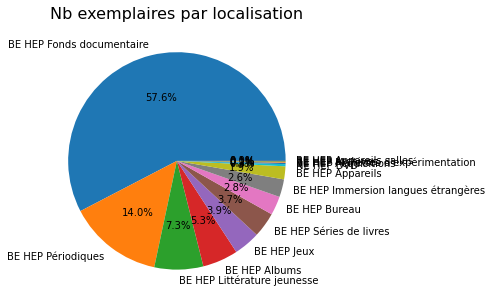

In [57]:
# Création du diagramme en secteurs
fig = plt.figure(figsize=(8, 5))
plt.pie(x=compte_par_loc, labels=compte_par_loc.index, autopct='%.1f%%')
_ = plt.title('Nb exemplaires par localisation', fontsize=16)

### Exercices avancés

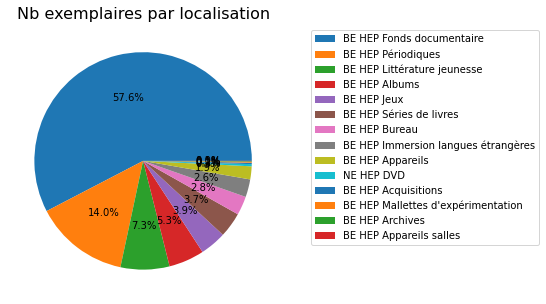

In [58]:
# Création du diagramme en secteurs
fig = plt.figure(figsize=(20, 5))
plt.pie(x=compte_par_loc, autopct='%.1f%%')
# A noter que 0 est en bas pour l'axe vertical
plt.legend(labels=compte_par_loc.index, loc='upper left', bbox_to_anchor=(1.1, 1))
_ = plt.title('Nb exemplaires par localisation', fontsize=16)

In [59]:
# Création d'une colonne pour les pourcentages
df = pd.DataFrame(compte_par_loc)

In [60]:
df['Pourcentages'] = np.round(df['Permanent Location']/df['Permanent Location'].sum()*100, 2)
df['Pourcentages'] = df['Pourcentages'].astype(str) + ' %'
df['Labels'] = df.index + ' (' + df['Pourcentages'] + ')'
df

,Permanent Location,Pourcentages,Labels
BE HEP Fonds documentaire,16355,57.63 %,BE HEP Fonds documentaire (57.63 %)
BE HEP Périodiques,3979,14.02 %,BE HEP Périodiques (14.02 %)
BE HEP Littérature jeunesse,2062,7.27 %,BE HEP Littérature jeunesse (7.27 %)
BE HEP Albums,1499,5.28 %,BE HEP Albums (5.28 %)
BE HEP Jeux,1109,3.91 %,BE HEP Jeux (3.91 %)
BE HEP Séries de livres,1057,3.72 %,BE HEP Séries de livres (3.72 %)
BE HEP Bureau,793,2.79 %,BE HEP Bureau (2.79 %)
BE HEP Immersion langues étrangères,750,2.64 %,BE HEP Immersion langues étrangères (2.64 %)
BE HEP Appareils,548,1.93 %,BE HEP Appareils (1.93 %)
NE HEP DVD,91,0.32 %,NE HEP DVD (0.32 %)


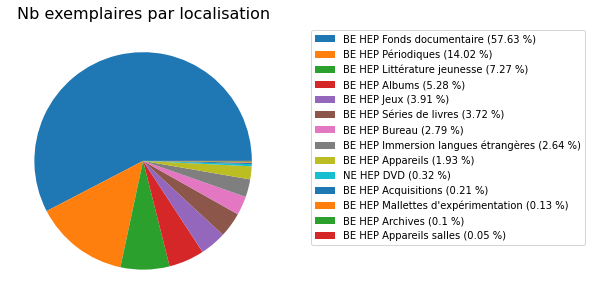

In [61]:
# Création du diagramme en secteurs
fig = plt.figure(figsize=(20, 5))
plt.pie(x=compte_par_loc)
# A noter que 0 est en bas pour l'axe vertical
plt.legend(labels=df['Labels'], loc='upper left', bbox_to_anchor=(1.1, 1))
_ = plt.title('Nb exemplaires par localisation', fontsize=16)